In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
hitl_iteration = 3
path_to_performances = Path.cwd() / 'resources' / 'final' / 'HITL-iteration-3' / 'model-selection'

In [3]:
paths_to_performances = [
    {
        "hitl_iteration": hitl_iteration,
        "cv_iteration": int(path.parts[-1].split('_')[4]) - 1,
        "path": path
    }
    for path in sorted(Path(path_to_performances).glob('validation_performance*.json'), key=lambda x: x.parts[-1].split('_')[-1])
]
paths_to_splits = [
    {
        "hitl_iteration": hitl_iteration,
        "path": Path(path_to_performances) / 'splits.csv'
    }
]

In [4]:
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_colwidth')

# Obtención de modelos: Validación Cruzada

Se propone una Validación Cruzada de tipo **Leave One Patient Out (LOPO)** para seleccionar el mejor modelo después de cada época de entrenamiento. Se obtiene un modelo para fold de la Validación Cruzada. Todos los modelos obtenidos pasan a ser evaluados sobre el conjunto de test. 

## Iteración 1

- Se tiene un conjunto de entrenamiento con **13 volúmenes CT** anotados por los becados, y corregidos por los radiólogos GP y MF, correspondientes a **4 pacientes**:
    - 2: cáncer gástrico (1 estudio, 2 series anotadas)
    - 8: cáncer gástrico (4 estudios, 6 series anotadas)
    - 12: cáncer de mama (2 estudios, 3 series anotadas)
    - 37: cáncer de pulmón (1 estudio, 2 series anotadas)

## Iteración 2

- Se tiene un conjunto de entrenamiento con **11 volúmenes CT** anotados por los becados, y corregidos por los radiólogos GP y MF, correspondientes a **4 pacientes**:
    - 5: cáncer de colon (1 estudio, 1 series anotada)
    - 7: cáncer de recto (3 estudios, 3 series anotadas)
    - 22: cáncer de colon (3 estudios, 6 series anotadas)
    - 24: cáncer gástrico (1 estudio, 1 serie anotada)


## Iteración 3

- Se tiene un conjunto de entrenamiento con **14 volúmenes CT** anotados por los becados, y corregidos por los radiólogos GP y MF, correspondientes a **6 pacientes**:
    - 1: cáncer de pulmon (1 estudio, 2 series anotadas)
    - 16: cáncer de pulmón (3 estudios, 3 series anotadas)
    - 23: cáncer de colon (3 estudios, 3 series anotadas)
    - 25: cáncer de vesícula (3 estudios, 3 series anotadas)
    - 31: cáncer de pulmón (2 estudios, 2 series anotadas)
    - 44: cáncer de ovario (1 estudio, 1 serie anotada)

In [5]:
# Read splits csv
path_to_splits_it1 = [item["path"] for item in paths_to_splits if item['hitl_iteration'] == paths_to_performances[0]['hitl_iteration']][0]
splits_it1_df = pd.read_csv(path_to_splits_it1)
#display(splits_it1_df)

In [6]:
# Validation patient for each fold
validation_patients = splits_it1_df[splits_it1_df['subset'] == 'validation'].groupby(['cv_iteration'])['patient_code'].unique().reset_index()
display(validation_patients)

,cv_iteration,patient_code
0,0,[1]
1,1,[12]
2,2,[16]
3,3,[2]
4,4,[22]
5,5,[23]
6,6,[24]
7,7,[25]
8,8,[31]
9,9,[37]


In [7]:
# Annotated slices for each series and patient
grouped = splits_it1_df.groupby(['patient_code', 'series_uuid']).size()
grouped = grouped.reset_index(name='annotated_slices')
display(grouped)

,patient_code,series_uuid,annotated_slices
0,1,1.3.12.2.1107.5.1.4.83504.30000023042612315883400041138,1470
1,1,1.3.12.2.1107.5.1.4.83504.30000023042612315883400041810,252
2,2,1.3.12.2.1107.5.1.4.83504.30000022071212080050700029044,84
3,2,1.3.12.2.1107.5.1.4.83504.30000022071212080050700029635,154
4,5,1.3.12.2.1107.5.1.4.83504.30000021052716090067300023414,84
5,7,1.3.12.2.1107.5.1.4.83504.30000021052612201586400049605,378
6,7,1.3.12.2.1107.5.1.4.83504.30000021080212120090000010256,448
7,7,1.3.12.2.1107.5.1.4.83504.30000021100712273932400016978,476
8,8,1.3.12.2.1107.5.1.4.83504.30000022101213201190600003679,378
9,8,1.3.12.2.1107.5.1.4.83504.30000022112912564272900008711,140


In [8]:
# Annotated slices per patient
grouped = splits_it1_df.groupby(['patient_code'])['series_uuid'].size()
grouped = grouped.reset_index(name='annotated_slices')
display(grouped)

,patient_code,annotated_slices
0,1,1722
1,2,238
2,5,84
3,7,1302
4,8,2688
5,12,10136
6,16,7490
7,22,3108
8,23,3178
9,24,854


In [9]:
# Annotated series per patient
grouped = splits_it1_df.groupby('patient_code')['series_uuid'].nunique()
grouped = grouped.reset_index(name='annotated_series')
display(grouped)

,patient_code,annotated_series
0,1,2
1,2,2
2,5,1
3,7,3
4,8,6
5,12,3
6,16,3
7,22,6
8,23,3
9,24,1


In [10]:
# Annotated series for each cv iteration and subset
grouped = splits_it1_df.groupby(['cv_iteration', 'subset'])['series_uuid'].nunique()
grouped = grouped.reset_index(name='annotated_series')
display(grouped)

,cv_iteration,subset,annotated_series
0,0,train,36
1,0,validation,2
2,1,train,35
3,1,validation,3
4,2,train,35
5,2,validation,3
6,3,train,36
7,3,validation,2
8,4,train,32
9,4,validation,6


In [11]:
# Annotated series per patient, for each cv iteration and subset
grouped = splits_it1_df.groupby(['cv_iteration', 'subset', 'patient_code'])['series_uuid'].nunique()
grouped = grouped.reset_index(name='annotated_series')
display(grouped)

,cv_iteration,subset,patient_code,annotated_series
0,0,train,2,2
1,0,train,5,1
2,0,train,7,3
3,0,train,8,6
4,0,train,12,3
...,...,...,...,...
191,13,train,25,3
192,13,train,31,2
193,13,train,37,2
194,13,train,44,1


In [12]:
# Read validation performances
it1_items = [item for item in paths_to_performances if item["hitl_iteration"] == paths_to_performances[0]['hitl_iteration']]
val_performances_it1 = pd.DataFrame()
for item in it1_items:
    with open(item['path'], 'r') as file:
        df = pd.DataFrame(json.load(file))
    df['cv_iteration'] = item['cv_iteration']
    val_performances_it1 = pd.concat([val_performances_it1, df])
display(val_performances_it1)

,epoch,batch_idx,loss,mean_dice_score,cv_iteration
0,0,0,0.104617,0.866546,0
1,0,1,0.064725,0.918590,0
2,0,2,0.080450,0.899572,0
3,0,3,0.045254,0.938987,0
4,0,4,0.111302,0.852657,0
...,...,...,...,...,...
9595,49,187,0.198761,0.759615,13
9596,49,188,0.076982,0.896590,13
9597,49,189,0.331927,0.620690,13
9598,49,190,0.031340,0.957404,13


In [13]:
# Plot mean dice score for each epoch and cv iteration
mean_std_df = val_performances_it1.groupby(['cv_iteration', 'epoch'])['mean_dice_score'].agg(['mean', 'std']).reset_index()
display(mean_std_df)

,cv_iteration,epoch,mean,std
0,0,0,0.851683,0.087936
1,0,1,0.854671,0.089324
2,0,2,0.844367,0.103489
3,0,3,0.859628,0.088069
4,0,4,0.847845,0.103519
...,...,...,...,...
695,13,45,0.839425,0.137405
696,13,46,0.848438,0.106184
697,13,47,0.830623,0.147788
698,13,48,0.842972,0.118309


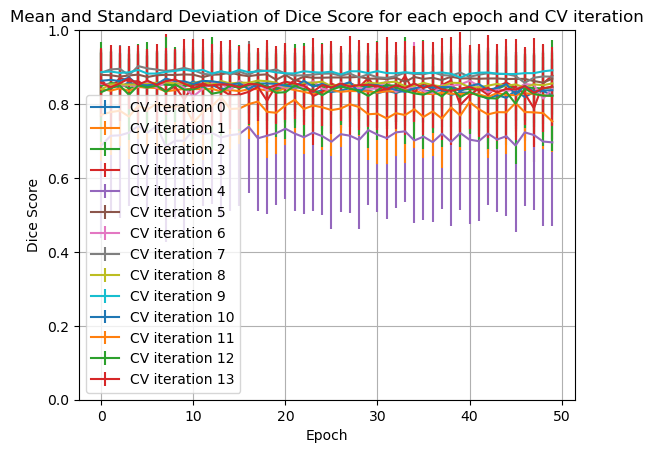

In [14]:
# Mean and std
for cv_iter in mean_std_df['cv_iteration'].unique():
    cv_iter_df = mean_std_df[mean_std_df['cv_iteration'] == cv_iter]
    plt.errorbar(cv_iter_df['epoch'], cv_iter_df['mean'], yerr=cv_iter_df['std'], label=f'CV iteration {cv_iter}')
plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.title('Mean and Standard Deviation of Dice Score for each epoch and CV iteration')
plt.legend()
plt.ylim((0, 1.0))
plt.grid(True)
plt.show()

#for cv_iter in mean_std_df['cv_iteration'].unique():
#    cv_iter_df = mean_std_df[mean_std_df['cv_iteration'] == cv_iter]
#    plt.errorbar(cv_iter_df['epoch'], cv_iter_df['mean'], yerr=cv_iter_df['std'], label=f'CV iteration {cv_iter}')
#    plt.xlabel('Epoch')
#    plt.ylabel('Dice Score')
#    plt.title('Mean and Standard Deviation of Dice Score for each epoch and CV iteration')
#    plt.ylim((0, 1.0))
#    plt.legend()
#    plt.grid(True)
#    plt.show()

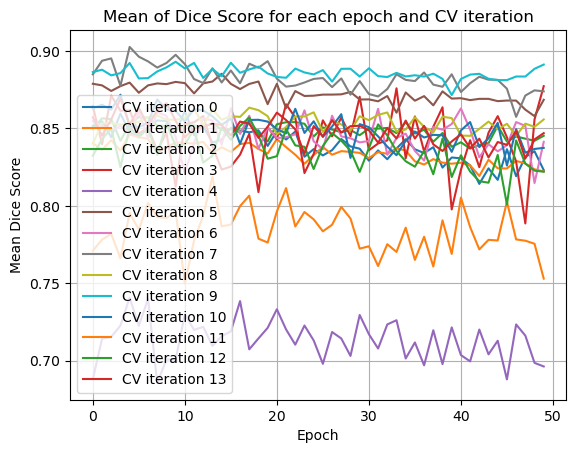

In [15]:
# Mean
for cv_iter in mean_std_df['cv_iteration'].unique():
    cv_iter_df = mean_std_df[mean_std_df['cv_iteration'] == cv_iter]
    plt.plot(cv_iter_df['epoch'], cv_iter_df['mean'], label=f'CV iteration {cv_iter}')

plt.xlabel('Epoch')
plt.ylabel('Mean Dice Score')
plt.title('Mean of Dice Score for each epoch and CV iteration')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
display(mean_std_df.loc[mean_std_df.groupby('cv_iteration')['mean'].idxmax()])

,cv_iteration,epoch,mean,std
10,0,10,0.861270,0.088721
54,1,4,0.846097,0.090504
105,2,5,0.857376,0.075056
199,3,49,0.877343,0.044139
204,4,4,0.740714,0.192022
264,5,14,0.885352,0.057913
315,6,15,0.863110,0.049743
354,7,4,0.902706,0.041074
417,8,17,0.863464,0.060217
459,9,9,0.893133,0.047814
